<a href="https://colab.research.google.com/github/Ermi1223/from-scratch-neural-network/blob/main/Neural%20Network%20from%20Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Implementing a Neural Network from Scratch Using Python and NumPy**

**1. Install Dependencies**

In [ ]:
!pip install numpy


**2. Imports & Setup**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

**3. Activation Functions & Derivatives**

In [ ]:
# --------------------- Activation Functions & Derivatives ---------------------
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    sig = sigmoid(x)
    return sig * (1 - sig)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

**4. Loss Function**

In [ ]:
# --------------------- Loss Function ---------------------
def categorical_cross_entropy(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)
    return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))

**5. Dense Layer Class**

In [ ]:
# --------------------- Dense Layer with Adam Optimizer ---------------------
class DenseLayer:
    def __init__(self, input_size, output_size, activation=None):
        self.weights = np.random.randn(input_size, output_size) * 0.01
        self.bias = np.zeros((1, output_size))
        self.activation = activation
        self.m_weights = np.zeros_like(self.weights)  # Adam
        self.v_weights = np.zeros_like(self.weights)
        self.m_bias = np.zeros_like(self.bias)
        self.v_bias = np.zeros_like(self.bias)

    def forward(self, inputs):
        self.inputs = inputs
        self.z = np.dot(inputs, self.weights) + self.bias
        if self.activation == 'relu':
            self.output = relu(self.z)
        elif self.activation == 'sigmoid':
            self.output = sigmoid(self.z)
        elif self.activation == 'tanh':
            self.output = tanh(self.z)
        elif self.activation == 'softmax':
            self.output = softmax(self.z)
        else:
            self.output = self.z
        return self.output

    def backward(self, dvalues, optimizer, t, beta1=0.9, beta2=0.999, epsilon=1e-8):
        # Activation derivative
        if self.activation == 'relu':
            dactivation = relu_derivative(self.z)
        elif self.activation == 'sigmoid':
            dactivation = sigmoid_derivative(self.z)
        elif self.activation == 'tanh':
            dactivation = tanh_derivative(self.z)
        else:
            dactivation = 1
        dvalues *= dactivation

        # Gradients
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbias = np.sum(dvalues, axis=0, keepdims=True)
        self.dinputs = np.dot(dvalues, self.weights.T)

        # Adam updates
        if optimizer == 'adam':
            self.m_weights = beta1 * self.m_weights + (1 - beta1) * self.dweights
            self.m_bias = beta1 * self.m_bias + (1 - beta1) * self.dbias
            self.v_weights = beta2 * self.v_weights + (1 - beta2) * (self.dweights ** 2)
            self.v_bias = beta2 * self.v_bias + (1 - beta2) * (self.dbias ** 2)

            # Bias correction
            m_hat_weights = self.m_weights / (1 - beta1 ** t)
            m_hat_bias = self.m_bias / (1 - beta1 ** t)
            v_hat_weights = self.v_weights / (1 - beta2 ** t)
            v_hat_bias = self.v_bias / (1 - beta2 ** t)

            # Update parameters
            self.weights -= learning_rate * m_hat_weights / (np.sqrt(v_hat_weights) + epsilon)
            self.bias -= learning_rate * m_hat_bias / (np.sqrt(v_hat_bias) + epsilon)

        return self.dinputs


**6. Neural Network Class**

In [ ]:
# --------------------- Neural Network ---------------------
class NeuralNetwork:
    def __init__(self, optimizer='adam', beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.layers = []
        self.optimizer = optimizer
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.t = 0

    def add_layer(self, layer):
        self.layers.append(layer)

    def forward(self, X):
        for layer in self.layers:
            X = layer.forward(X)
        return X

    def backward(self, y_true, y_pred, learning_rate):
        dvalues = y_pred - y_true
        self.t += 1
        for layer in reversed(self.layers):
            dvalues = layer.backward(
                dvalues,
                optimizer=self.optimizer,
                t=self.t,
                beta1=self.beta1,
                beta2=self.beta2,
                epsilon=self.epsilon
            )


**7. Training & Visualization**

Epoch 0, Loss: 0.6932
Epoch 100, Loss: 0.6668
Epoch 200, Loss: 0.1964
Epoch 300, Loss: 0.0464
Epoch 400, Loss: 0.0210
Epoch 500, Loss: 0.0124
Epoch 600, Loss: 0.0083
Epoch 700, Loss: 0.0060
Epoch 800, Loss: 0.0046
Epoch 900, Loss: 0.0036

Test Predictions:
Input [0. 0.]: Class 0 ([[0.99731509 0.00268491]])
Input [0. 1.]: Class 1 ([[0.00265725 0.99734275]])
Input [1. 0.]: Class 1 ([[0.00265457 0.99734543]])
Input [1. 1.]: Class 0 ([[0.99635234 0.00364766]])
Input [0.5 0.5]: Class 1 ([[0.00265591 0.99734409]])


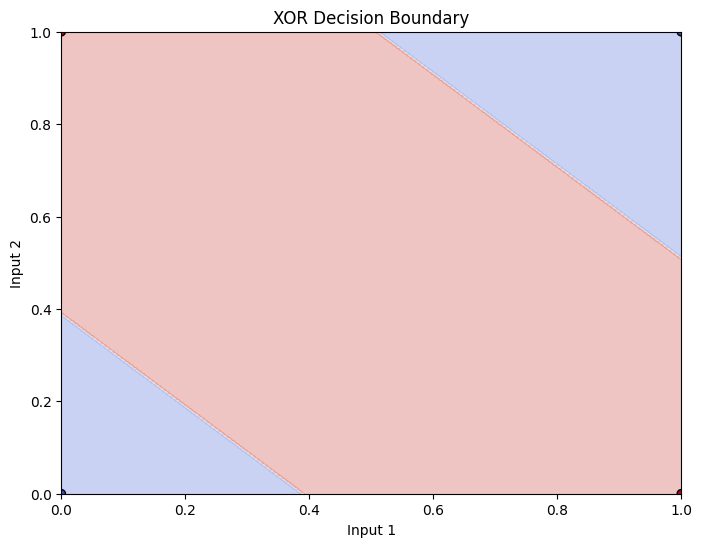

In [ ]:
# --------------------- Training & Visualization ---------------------
if __name__ == "__main__":
    # XOR dataset
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([[1, 0], [0, 1], [0, 1], [1, 0]])  # One-hot

    # Create network
    nn = NeuralNetwork(optimizer='adam')
    nn.add_layer(DenseLayer(2, 4, activation='sigmoid'))  # Hidden
    nn.add_layer(DenseLayer(4, 2, activation='softmax'))  # Output

    # Training
    epochs = 1000
    learning_rate = 0.01
    for epoch in range(epochs):
        y_pred = nn.forward(X)
        loss = categorical_cross_entropy(y, y_pred)
        nn.backward(y, y_pred, learning_rate)
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    # Test predictions
    print("\nTest Predictions:")
    test_inputs = np.array([[0,0], [0,1], [1,0], [1,1], [0.5, 0.5]])
    for x in test_inputs:
        prob = nn.forward(x.reshape(1, -1))
        print(f"Input {x}: Class {np.argmax(prob)} ({prob})")

    # Plot decision boundary
    xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = nn.forward(grid)
    preds = np.argmax(probs, axis=1).reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, preds, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:,0], X[:,1], c=np.argmax(y, axis=1), cmap='coolwarm', edgecolors='k')
    plt.title("XOR Decision Boundary")
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.show()